In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [4]:
df=pd.read_csv(r"C:\Users\Ratne\Downloads\BostonHousing.csv")

In [5]:
print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [6]:
corr=df.corr

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

# Observation

<Figure size 200x200 with 0 Axes>

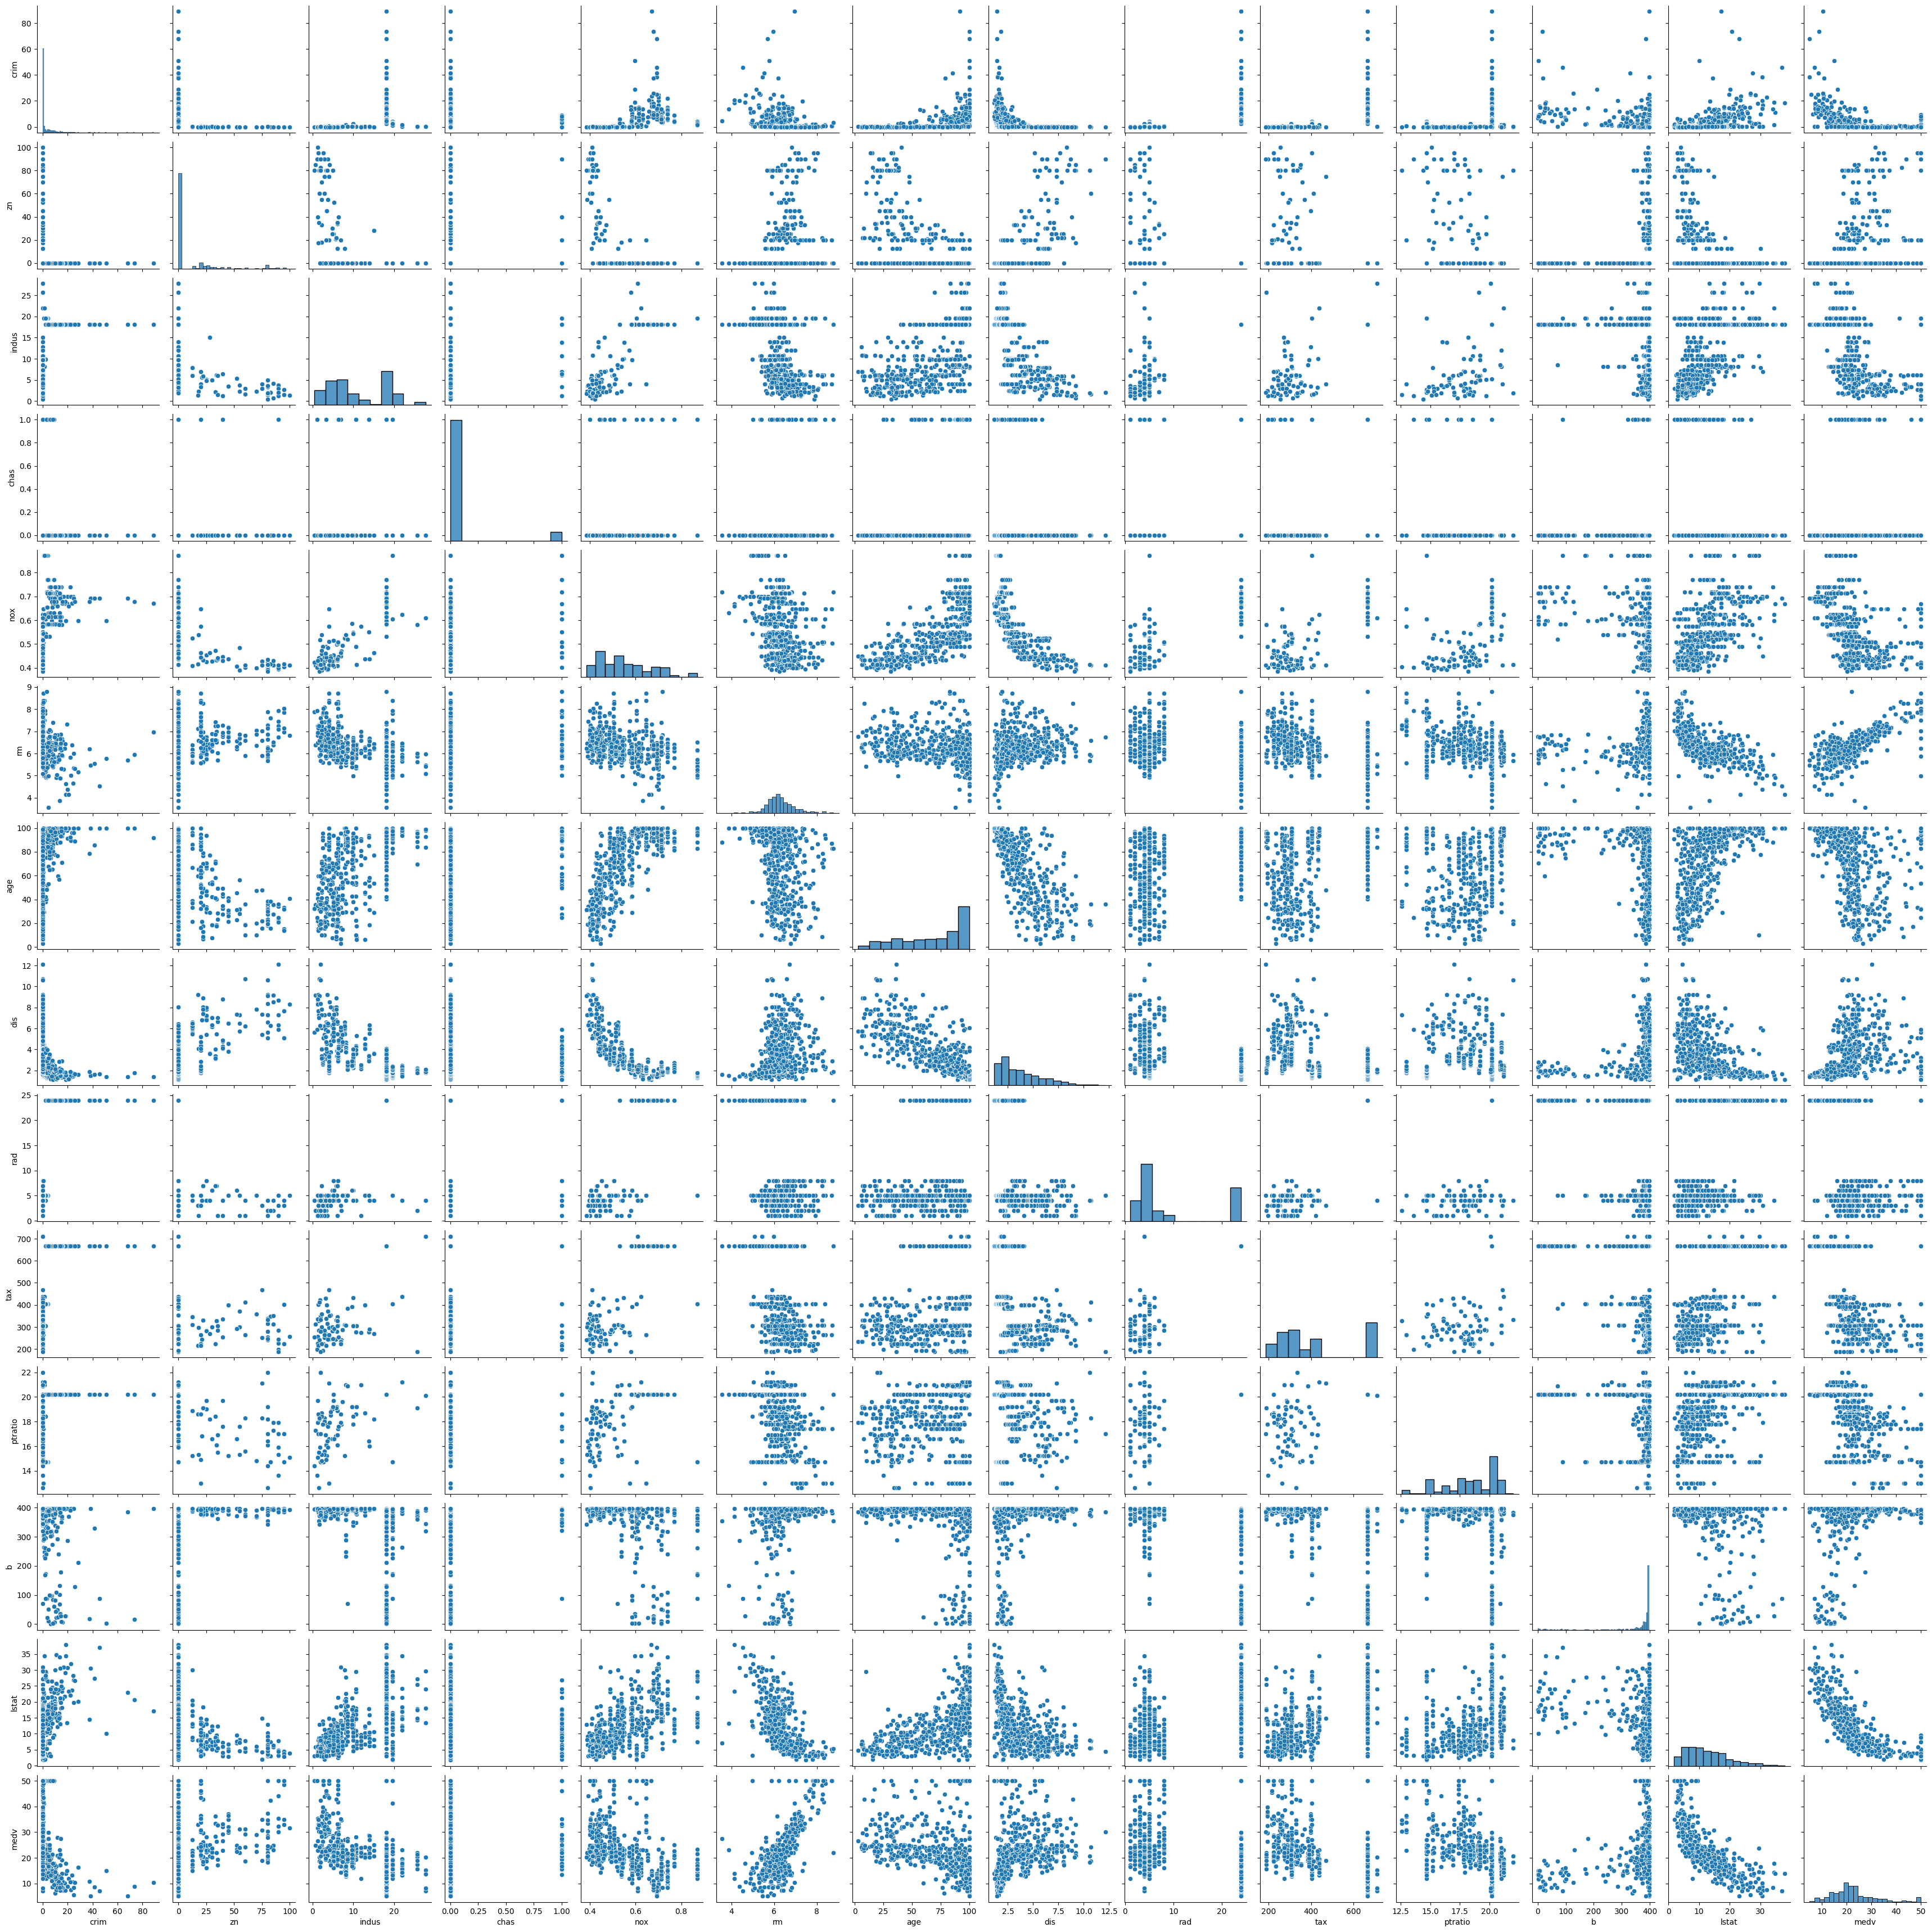

In [10]:
plt.figure(figsize  = (2, 2))
sb.pairplot(df)

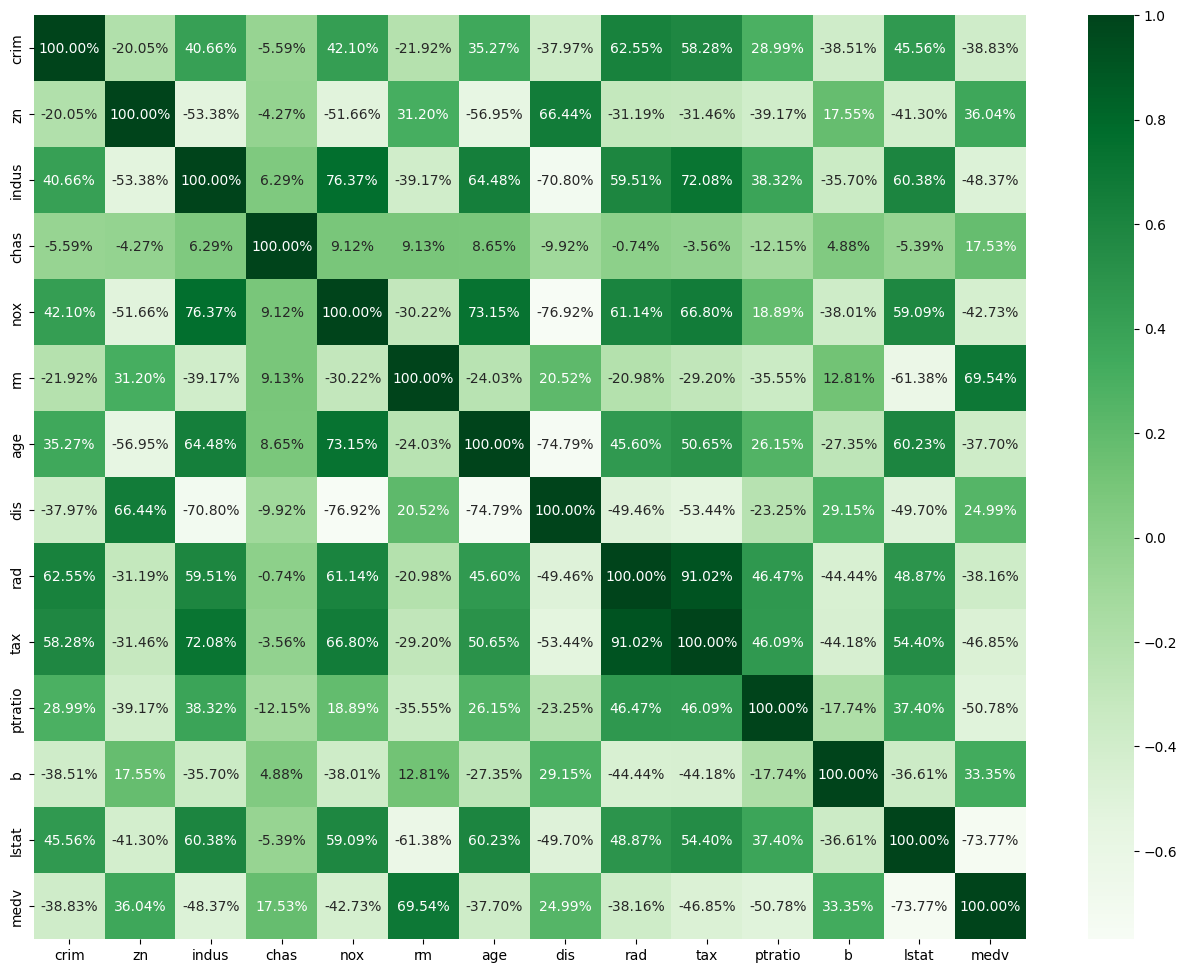

In [11]:
plt.figure(figsize = (16, 12))# Correlation
sb.heatmap(df.corr(), cmap = 'Greens', annot = True, fmt = '.2%')
plt.savefig('features_correlation.png')

{'whiskers': [<matplotlib.lines.Line2D at 0x24df381a8a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24dece087d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24df1aeaf60>],
 'medians': [<matplotlib.lines.Line2D at 0x24decbeaa50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24decf05400>],
 'means': []}

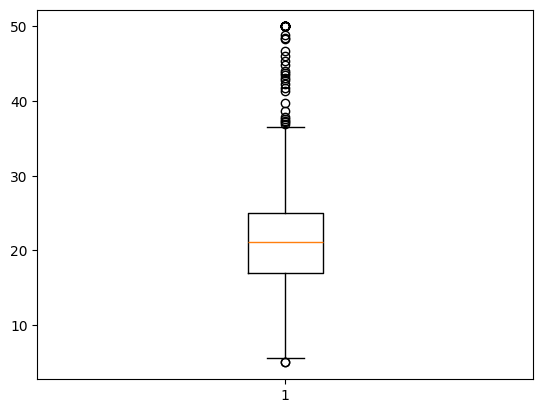

In [12]:
plt.boxplot(df["medv"])

In [13]:
df = df[~(df['medv'] >= 50.0)]
print(np.shape(df))

(490, 14)


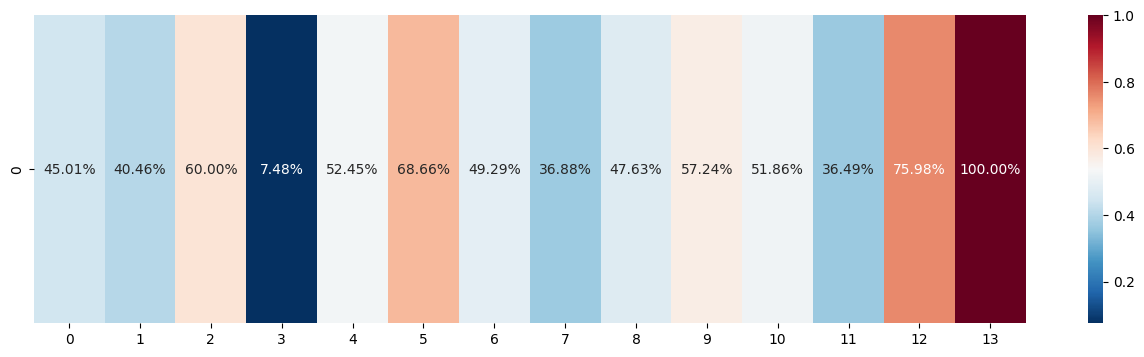

In [14]:
corr_with_medv = df.corrwith(df['medv'])
plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.savefig('correlation_with_price.png')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     490 non-null    float64
 1   zn       490 non-null    float64
 2   indus    490 non-null    float64
 3   chas     490 non-null    int64  
 4   nox      490 non-null    float64
 5   rm       490 non-null    float64
 6   age      490 non-null    float64
 7   dis      490 non-null    float64
 8   rad      490 non-null    int64  
 9   tax      490 non-null    int64  
 10  ptratio  490 non-null    float64
 11  b        490 non-null    float64
 12  lstat    490 non-null    float64
 13  medv     490 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 57.4 KB


# Machine Learning Model

In [16]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=linear_model.predict(X_test)

In [21]:
print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))
#print("Accurcy Score: ")
print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))
print("Mean Absolute Error : ", mean_absolute_error(y_test, linear_model.predict(X_test)))

Training Score :  0.7764851110521345
Testing Score  :  0.7640047258028559
R2 Score :  0.7640047258028559
MSE :  12.055902866387603
Mean Absolute Error :  2.6415049059591547


In [ ]:
actual_predicted_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': linear_model.predict(X_test)
})

actual_predicted_df.head()

,Actual Values,Predicted Values
0,19.1,16.122396
1,23.9,25.239663
2,13.4,16.143922
3,7.0,8.340355
4,10.8,11.825597


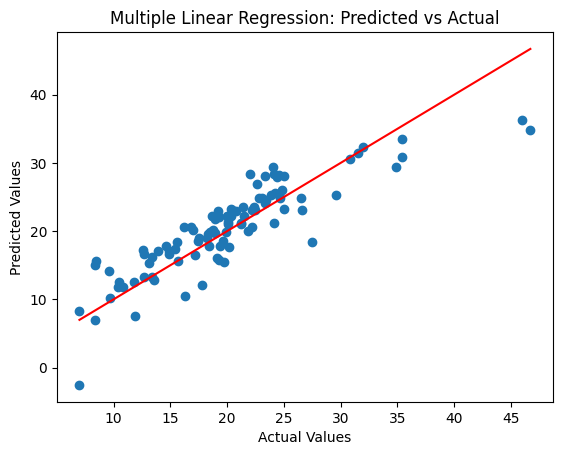

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(max_depth=5,random_state=42)
dtr_model.fit(X_train, y_train)
#r2_score(y_test, dtr_model.predict(X_test))

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
dtr_model.score(X_train, y_train)

0.903885639987912

In [ ]:
dtr_model.score(X_test, y_test)

0.8082617019166098

In [ ]:
r2_score(y_test, dtr_model.predict(X_test))

0.8082617019166098

In [ ]:
mean_squared_error(y_test, dtr_model.predict(X_test))

9.795019435553588

In [ ]:
print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))
print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))
print("Mean Absolute Error : ", mean_absolute_error(y_test, dtr_model.predict(X_test)))

Training Score :  0.903885639987912
Testing Score  :  0.8082617019166098
R2 Score :  0.8082617019166098
MSE :  9.795019435553588
Mean Absolute Error :  2.319406091191055


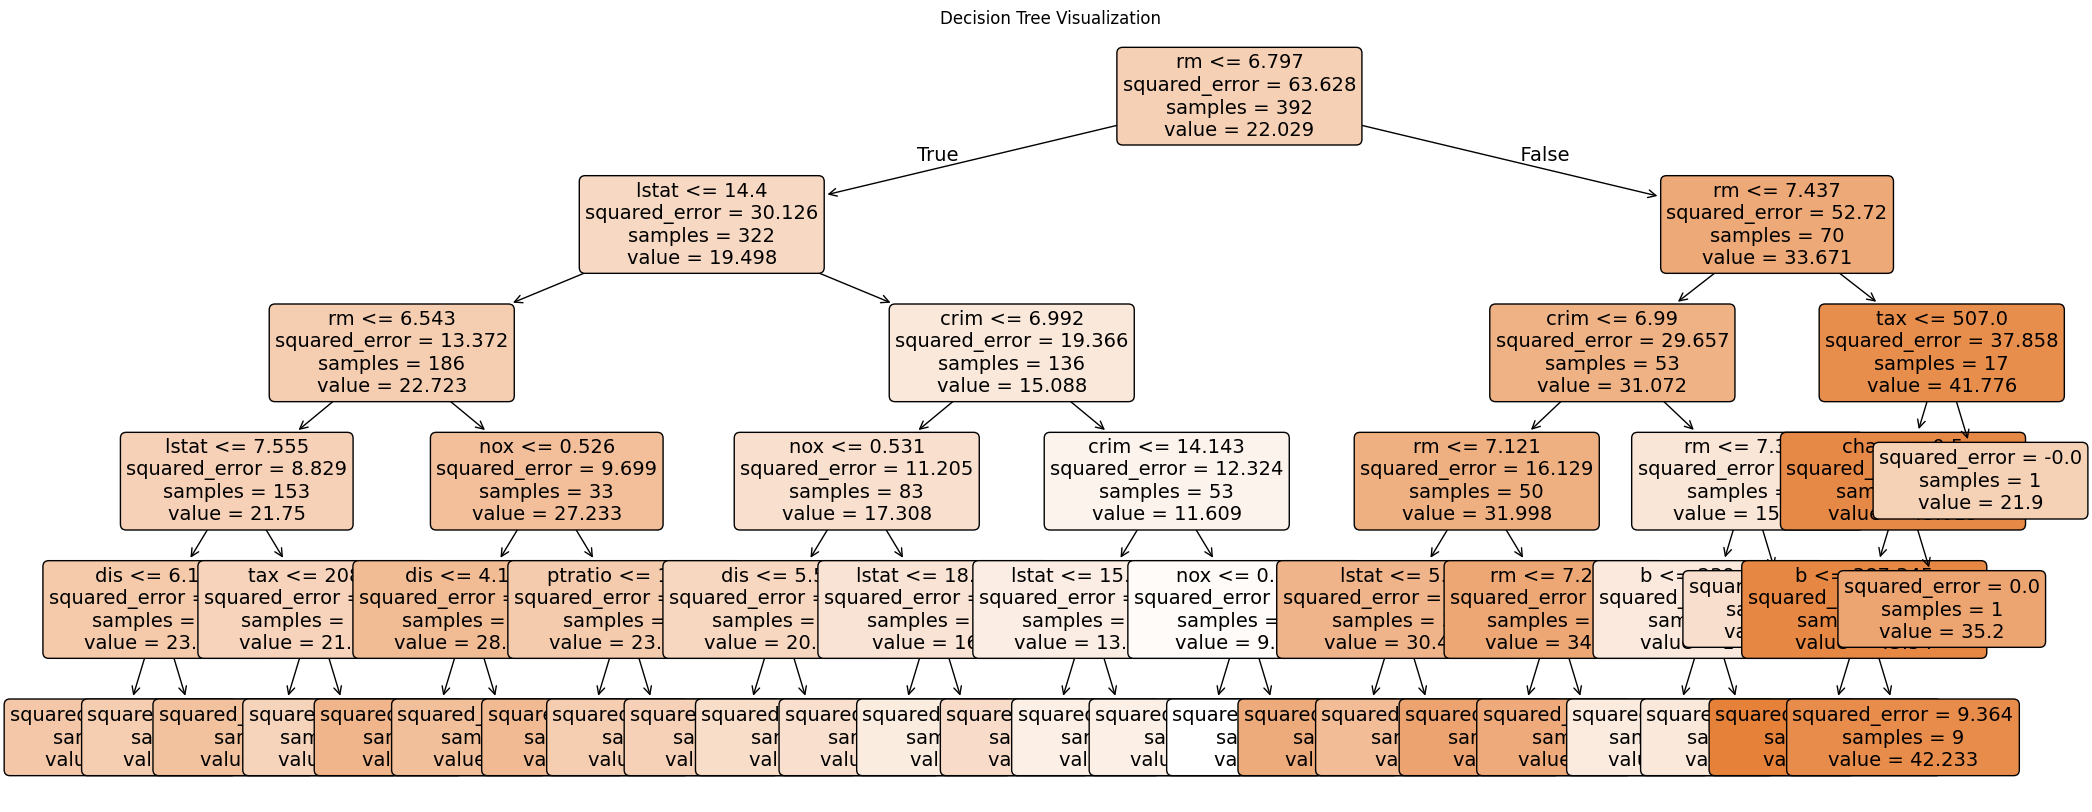

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(25, 10))
plot_tree(dtr_model, feature_names=X.columns, filled=True, rounded=True,fontsize=14)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
actual_predicted_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': dtr_model.predict(X_test)
})

actual_predicted_df.head()

,Actual Values,Predicted Values
0,19.1,12.983333
1,23.9,20.988034
2,13.4,17.385714
3,7.0,13.900000
4,10.8,12.950000


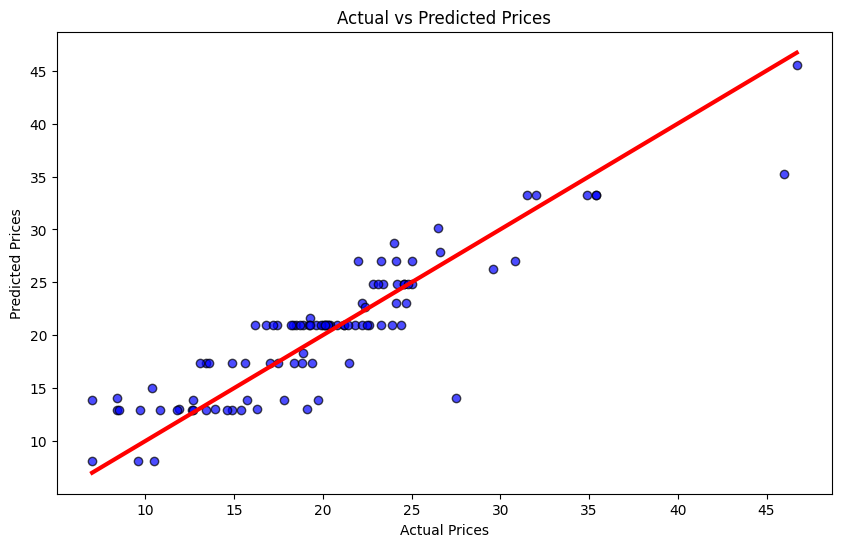

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dtr_model.predict(X_test), color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#rf=RandomForestRegressor()

In [ ]:
from sklearn.metrics import roc_curve,auc 
rf_auc=auc()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)
print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))
print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.963207518108509
Testing Score  :  0.8674533074788369
R2 Score :  0.8674533074788369
MSE :  6.7711951255480916


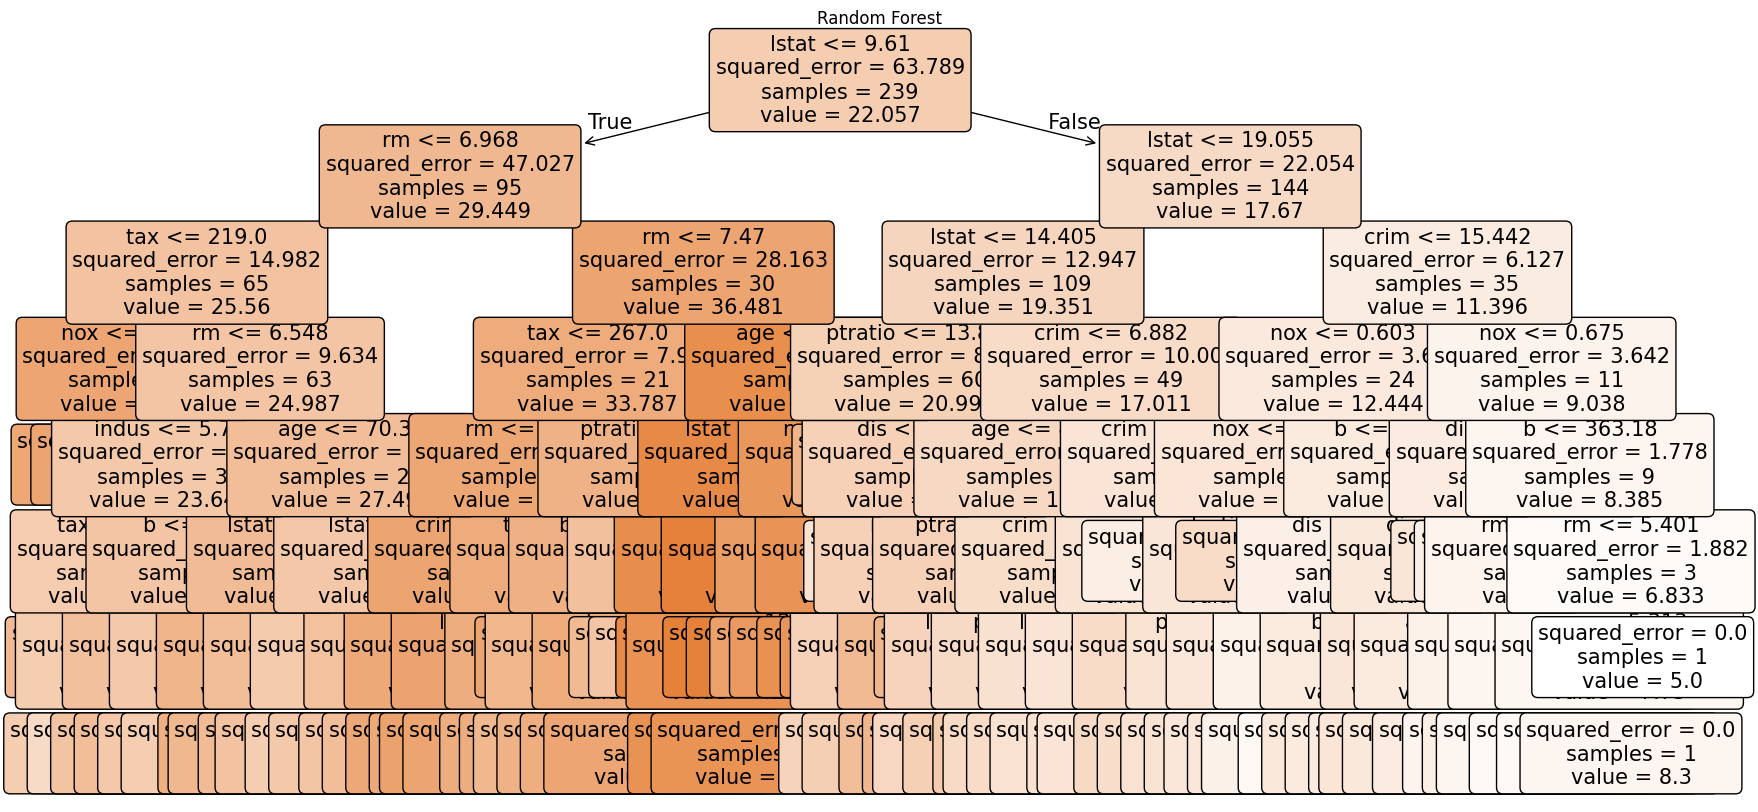

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rfr.estimators_[0], feature_names=X.columns, filled=True, rounded=True,fontsize=15)
plt.title("Random Forest")
plt.show()

In [ ]:
actual_predicted_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': rfr.predict(X_test)
})

actual_predicted_df.head()

,Actual Values,Predicted Values
0,19.1,15.381534
1,23.9,21.981996
2,13.4,15.681601
3,7.0,12.886291
4,10.8,10.774764


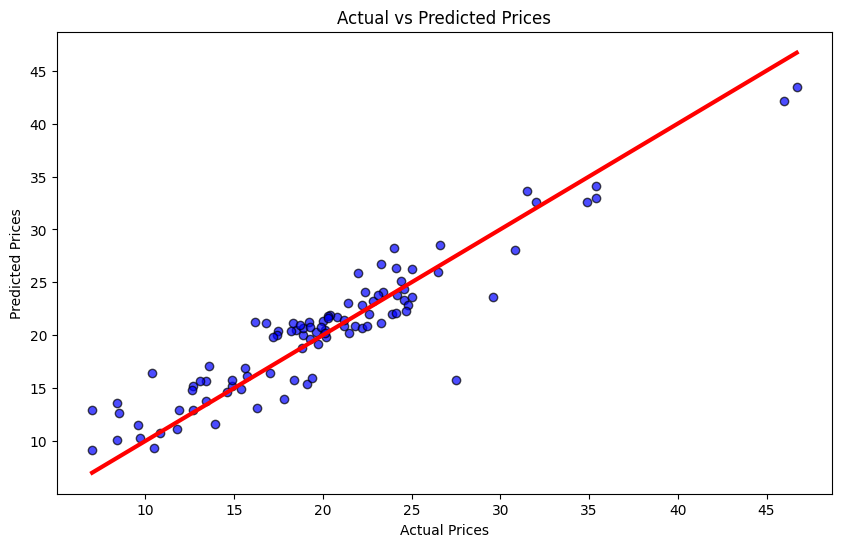

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfr.predict(X_test), color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=10, random_state=42)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))


Linear Regression : 
Score :  0.7640047258028559
Decision Tree Regression : 
Score :  0.8001751618188049
Random Forest Regression : 
Score :  0.8674533074788369
